<a href="https://colab.research.google.com/github/kirbu123/TinkoffSiriusMLChallange/blob/main/TinkoffSiriusTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tqdm import tqdm

## Скачиваем данные

In [6]:
!wget https://cs.slu.edu/~stylianou/images/hotels-50k/test.tar.lz4

--2023-08-31 14:04:07--  https://cs.slu.edu/~stylianou/images/hotels-50k/test.tar.lz4
Resolving cs.slu.edu (cs.slu.edu)... 165.134.107.79
Connecting to cs.slu.edu (cs.slu.edu)|165.134.107.79|:443... connected.
ERROR: cannot verify cs.slu.edu's certificate, issued by ‘CN=InCommon RSA Server CA,OU=InCommon,O=Internet2,L=Ann Arbor,ST=MI,C=US’:
  Unable to locally verify the issuer's authority.
To connect to cs.slu.edu insecurely, use `--no-check-certificate'.


In [7]:
!git clone https://github.com/GWUvision/Hotels-50K.git

fatal: destination path 'Hotels-50K' already exists and is not an empty directory.


In [8]:
!unzip /content/Hotels-50K/images/people_crops.tar.gz

Archive:  /content/Hotels-50K/images/people_crops.tar.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/Hotels-50K/images/people_crops.tar.gz or
        /content/Hotels-50K/images/people_crops.tar.gz.zip, and cannot find /content/Hotels-50K/images/people_crops.tar.gz.ZIP, period.


In [9]:
!tar -xvzf /content/Hotels-50K/images/people_crops.tar.gz

Выходные данные были обрезаны до нескольких последних строк (5000).
people_crops/18779.png
people_crops/8429.png
people_crops/28876.png
people_crops/16740.png
people_crops/40506.png
people_crops/21852.png
people_crops/7068.png
people_crops/43769.png
people_crops/41156.png
people_crops/7040.png
people_crops/6438.png
people_crops/13610.png
people_crops/7726.png
people_crops/17476.png
people_crops/41624.png
people_crops/28692.png
people_crops/13162.png
people_crops/5643.png
people_crops/30988.png
people_crops/20543.png
people_crops/13189.png
people_crops/14180.png
people_crops/30036.png
people_crops/17489.png
people_crops/2879.png
people_crops/18976.png
people_crops/13823.png
people_crops/9086.png
people_crops/12283.png
people_crops/32153.png
people_crops/26126.png
people_crops/11952.png
people_crops/7083.png
people_crops/35614.png
people_crops/26668.png
people_crops/35172.png
people_crops/98.png
people_crops/2689.png
people_crops/18792.png
people_crops/5858.png
people_crops/31466.png
peo

In [10]:
!tar -xvzf /content/Hotels-50K/input/dataset.tar.gz

dataset/
dataset/chain_info.csv
dataset/._hotel_info.csv
dataset/._chain_info.csv
dataset/test_set.csv
dataset/train_set.csv
dataset/hotel_info.csv
dataset/._test_set.csv


Скачать в лоб не получается:

In [11]:
!python /content/Hotels-50K/download_train.py # ошибка с доступом к сайту

/content/Hotels-50K/download_train.py:10: DeprecationWarning: AppURLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  opener = AppURLopener()
Traceback (most recent call last):
  File "/content/Hotels-50K/download_train.py", line 75, in <module>
    retcode = main()
  File "/content/Hotels-50K/download_train.py", line 45, in main
    hotel_f = open('./input/dataset/hotel_info.csv','r')
FileNotFoundError: [Errno 2] No such file or directory: './input/dataset/hotel_info.csv'


Исправленный скрипт для скачивания (скрипт обходит проверку сайта на безопасность и успешно скачивает изображения):

In [12]:
from __future__ import print_function
import csv, multiprocessing, cv2, os
import numpy as np
import urllib
import urllib.request
import ssl

class AppURLopener(urllib.request.FancyURLopener):
    version = "Mozilla/5.0"

opener = AppURLopener()
def url_to_image(url):
    context = ssl.create_default_context()
    context.check_hostname = False
    context.verify_mode = ssl.CERT_NONE
    response = urllib.request.urlopen(url, context=context)
    #filename, headers = urllib.request.urlretrieve(url, filename='image.jpg', context=context)
    #resp = opener.open(url)
    image = np.asarray(bytearray(response.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)
    return image

# chain,hotel,im_source,im_id,im_url
def download_and_resize(imList):
    for im in imList:
        try:
            saveDir = os.path.join('./images/train/',im[0],im[1],im[2])
            if not os.path.exists(saveDir):
                os.makedirs(saveDir)

            savePath = os.path.join(saveDir,str(im[3])+'.'+im[4].split('.')[-1])

            if not os.path.isfile(savePath):
                img = url_to_image(im[4])
                if img.shape[1] > img.shape[0]:
                    width = 640
                    height = round((640 * img.shape[0]) / img.shape[1])
                    img = cv2.resize(img,(width, height))
                else:
                    height = 640
                    width = round((640 * img.shape[1]) / img.shape[0])
                    img = cv2.resize(img,(width, height))
                cv2.imwrite(savePath,img)
                print('Good: ' + savePath)
            else:
                print('Already saved: ' + savePath)
        except:
            print('Bad: ' + savePath)

def download_and_resize_noexcept(imList):
    for im in imList:
        saveDir = os.path.join('./images/train/',im[0],im[1],im[2])
        if not os.path.exists(saveDir):
            os.makedirs(saveDir)

        savePath = os.path.join(saveDir,str(im[3])+'.'+im[4].split('.')[-1])

        if not os.path.isfile(savePath):
            img = url_to_image(im[4])
            if img.shape[1] > img.shape[0]:
                width = 640
                height = round((640 * img.shape[0]) / img.shape[1])
                img = cv2.resize(img,(width, height))
            else:
                height = 640
                width = round((640 * img.shape[1]) / img.shape[0])
                img = cv2.resize(img,(width, height))
            cv2.imwrite(savePath,img)
            print('Good: ' + savePath)
        else:
            print('Already saved: ' + savePath)

def main():
    hotel_f = open('/content/Hotels-50K/input/dataset/hotel_info.csv','r')
    hotel_reader = csv.reader(hotel_f)
    hotel_headers = next(hotel_reader,None)
    hotel_to_chain = {}
    for row in hotel_reader:
        hotel_to_chain[row[0]] = row[2]

    train_f = open('/content/Hotels-50K/input/dataset/train_set.csv','r')
    train_reader = csv.reader(train_f)
    train_headers = next(train_reader,None)

    images = []
    count = 0
    for im in train_reader:
        if count >= 1000:
            break
        im_id = im[0]
        im_url = im[2]
        im_source = im[3]
        hotel = im[1]
        chain = hotel_to_chain[hotel]
        images.append((chain,hotel,im_source,im_id,im_url))
        count += 1

    #download_and_resize_noexcept(images)

    pool = multiprocessing.Pool()
    NUM_THREADS = multiprocessing.cpu_count()

    imDict = {}
    for cpu in range(NUM_THREADS):
        pool.apply_async(download_and_resize_noexcept,[images[cpu::NUM_THREADS]])
    pool.close()
    pool.join()

if __name__ == '__main__':
    retcode = main()

<ipython-input-12-dfe71c3d7798>:11: DeprecationWarning: AppURLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  opener = AppURLopener()


Already saved: ./images/train/3/18187/traffickcam/3486.jpg
Already saved: ./images/train/76/86350/traffickcam/2586939.jpg
Already saved: ./images/train/-1/1533/traffickcam/2586951.jpg
Already saved: ./images/train/66/46120/traffickcam/2586986.jpgAlready saved: ./images/train/2/73224/traffickcam/3663.jpg

Already saved: ./images/train/-1/1533/traffickcam/2586950.jpg
Already saved: ./images/train/-1/28582/traffickcam/2586991.jpg
Already saved: ./images/train/-1/1533/traffickcam/2586952.jpgAlready saved: ./images/train/76/86350/traffickcam/2587024.jpg
Already saved: ./images/train/66/46120/traffickcam/2586989.jpg

Already saved: ./images/train/76/86350/traffickcam/2587023.jpgAlready saved: ./images/train/71/81814/traffickcam/2587067.jpg

Already saved: ./images/train/71/81814/traffickcam/2587069.jpgAlready saved: ./images/train/76/86350/traffickcam/2587026.jpg

Already saved: ./images/train/87/76596/traffickcam/2587081.jpgAlready saved: ./images/train/71/81814/traffickcam/2587068.jpg

Alr

функция для обхода по всем картинкам, выводящая их количество:

In [13]:
count = 0
def count_all(file_name):
  global count
  folder_contents = os.listdir(file_name)
  for item in folder_contents:
    item_path = os.path.join(file_name, item)
    if os.path.isdir(item_path):
        count_all(item_path)
    else:
        count += 1
  return count

In [14]:
count_all('/content/images/train')

1000

иллюстрация того, что лежит внутри .csv файла для скачивания датасета

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data = pd.read_csv('/content/Hotels-50K/input/dataset/hotel_info.csv')
data.head()

hotel_id                                         hotel_name  chain_id  \
0       391  Extended Stay America - Fairbanks - Old Airpor...        72   
1       392                Hilton Hangzhou Qiandao Lake Resort         3   
2       393                                      Taj Lands End        -1   
3       395                      Cambridge Suites Hotel Sydney        -1   
4       396                                       Tamanu Beach        14   

   latitude  longitude  
0  64.83538 -147.82330  
1  29.60819  119.07290  
2  19.04391   72.81879  
3  46.13663  -60.19551  
4 -18.84213 -159.78794

## Анализ датасета

Пример фотографии отеля




In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

функция для вывода изображений

In [ ]:
def show_image(img_pass):
  img = mpimg.imread(img_pass)
  imgplot = plt.imshow(img)
  plt.show()

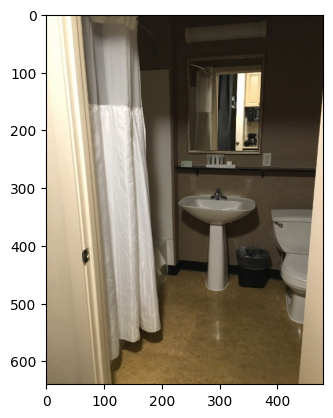

In [18]:
show_image('/content/images/train/-1/10438/traffickcam/2587991.jpg')

в массив all_pictures положим все пути картинок

In [19]:
import numpy as np
import matplotlib.pyplot as plt

all_pictures = []

def count_all(file_name):
  global all_pictures
  folder_contents = os.listdir(file_name)
  for item in folder_contents:
    item_path = os.path.join(file_name, item)
    if os.path.isdir(item_path):
        count_all(item_path)
    else:
        all_pictures.append(item_path)

count_all('/content/images/train')

In [20]:
all_pictures, len(all_pictures)

(['/content/images/train/78/15509/traffickcam/2589381.jpg',
  '/content/images/train/78/15509/traffickcam/2589383.jpg',
  '/content/images/train/78/15509/traffickcam/2589384.jpg',
  '/content/images/train/78/6716/traffickcam/2591771.jpg',
  '/content/images/train/78/46621/traffickcam/2589846.jpg',
  '/content/images/train/78/115219/traffickcam/2589309.jpg',
  '/content/images/train/78/115219/traffickcam/2589306.jpg',
  '/content/images/train/78/9946/traffickcam/2589634.jpg',
  '/content/images/train/5/15634/traffickcam/2590461.jpg',
  '/content/images/train/5/15634/traffickcam/2590462.jpg',
  '/content/images/train/92/110659/traffickcam/2589977.jpg',
  '/content/images/train/92/20343/traffickcam/2591158.jpg',
  '/content/images/train/92/20343/traffickcam/2591156.jpg',
  '/content/images/train/92/76664/traffickcam/2588422.jpg',
  '/content/images/train/92/55602/traffickcam/2588319.jpg',
  '/content/images/train/92/8973/traffickcam/2590262.jpg',
  '/content/images/train/92/8973/traffickc

попытка представить серию изображений для наглядности

In [21]:
import pygame

pygame 2.5.1 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


640 480
640 480
640 480
640 480
640 480
640 480
640 480
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
640 480
480 640
480 640
480 640


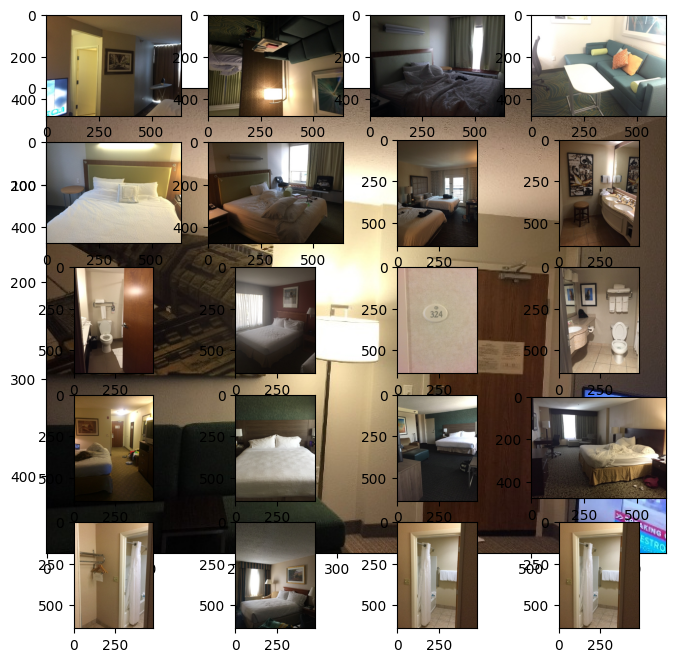

In [22]:
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

for i in range(1, columns * rows +1):
    img = mpimg.imread(all_pictures[i])
    imgplot = plt.imshow(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    img = pygame.image.load(all_pictures[i])
    width = img.get_width()
    height = img.get_height()
    print(width, height)
plt.show()

Согласно описанию датасета данные распределены равномерно и имеют большую дисперсию. Поэтому в качестве train выборки я взял ограниченное количество данных из исходного датасета, таким образом я получу хорошую подборку картинок с большой дисперсией по тегам, на анализ которой будет затрачено небольшое количество времени

теперь проанализируем датасет

In [23]:
list_sizes = list()
list_sizes_not_unique = list()

In [24]:
for pas in all_pictures:
  img = pygame.image.load(pas)
  width = img.get_width()
  height = img.get_height()
  if [width, height] not in list_sizes:
    list_sizes.append([width, height])
  list_sizes_not_unique.append([width, height])

возможные размеры объектов

In [25]:
list_sizes, len(list_sizes)

([[640, 480],
  [480, 640],
  [640, 360],
  [640, 139],
  [478, 640],
  [360, 640],
  [640, 637],
  [359, 640],
  [603, 640],
  [640, 590],
  [640, 368],
  [640, 361],
  [640, 478],
  [640, 296],
  [640, 362]],
 15)

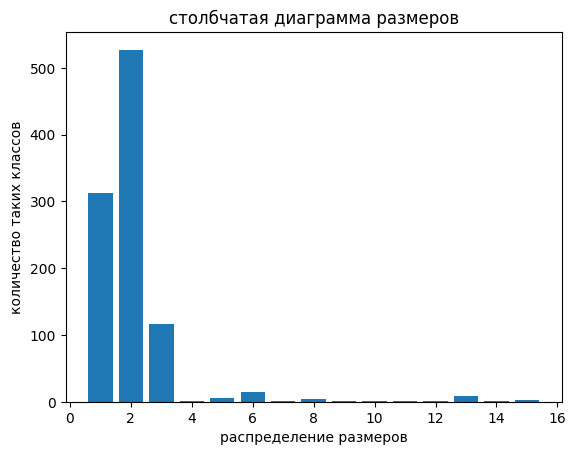

In [26]:
x, y = list(), list()

count = 0
for item in list_sizes:
  count += 1
  x.append(count), y.append(list_sizes_not_unique.count(item))

plt.bar(x, y)

# setting x-label as pen sold
plt.xlabel('распределение размеров')

# setting y_label as price
plt.ylabel('количество таких классов')
plt.title('столбчатая диаграмма размеров')
plt.show()

под индексами оси x принимаются

In [27]:
count = 0
for item in list_sizes:
  count += 1
  print(str(count) + ': ' + str(item[0]) + 'x' + str(item[1]))

1: 640x480
2: 480x640
3: 640x360
4: 640x139
5: 478x640
6: 360x640
7: 640x637
8: 359x640
9: 603x640
10: 640x590
11: 640x368
12: 640x361
13: 640x478
14: 640x296
15: 640x362


под индексами диаграммы ниже принимаются те же соотножения индексов и размеров

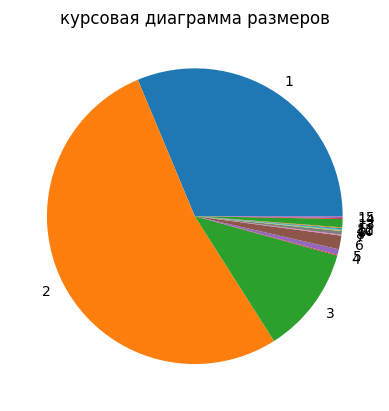

In [28]:
# данные для диаграммы
labels = x
values = y

# создание диаграммы
plt.pie(values, labels=labels)

# комментарии к диаграмме
plt.title('курсовая диаграмма размеров')

# отображение диаграммы
plt.show()

возможные классы объектов

In [29]:
file_name = '/content/images/train'
folder_contents = os.listdir(file_name)
classes = list()
for item in folder_contents:
  item_path = os.path.join(file_name, item)
  if int(item) not in classes:
    classes.append(int(item))


In [30]:
classes, len(classes)

([78,
  5,
  92,
  77,
  87,
  84,
  51,
  76,
  61,
  50,
  33,
  42,
  44,
  49,
  58,
  82,
  73,
  1,
  86,
  65,
  47,
  71,
  89,
  60,
  0,
  -1,
  54,
  75,
  70,
  67,
  7,
  91,
  85,
  48,
  63,
  90,
  30,
  3,
  72,
  69,
  81,
  17,
  36,
  83,
  57,
  68,
  79,
  80,
  62,
  25,
  35,
  34,
  2,
  66,
  32,
  59,
  74,
  88],
 58)

анализ сбалансированности датасета (за уникальный класс считается chain_id отеля на фотографии)



In [31]:
def count_upper(file_name):
  global count
  folder_contents = os.listdir(file_name)
  for item in folder_contents:
    item_path = os.path.join(file_name, item)
    if os.path.isdir(item_path):
        count_upper(item_path)
    else:
        count += 1
  return count

In [32]:
file_name = '/content/images/train'
folder_contents = os.listdir(file_name)

list_count = list()

count = 0

for item in folder_contents:
  count = 0
  list_count.append(count_upper(file_name + '/' + item))

In [33]:
list_count

[8,
 2,
 71,
 12,
 20,
 11,
 2,
 39,
 6,
 2,
 4,
 2,
 2,
 1,
 5,
 6,
 5,
 40,
 22,
 18,
 7,
 24,
 26,
 11,
 24,
 185,
 4,
 4,
 2,
 5,
 1,
 37,
 5,
 2,
 3,
 23,
 4,
 49,
 1,
 5,
 25,
 1,
 10,
 17,
 3,
 1,
 29,
 35,
 1,
 3,
 2,
 1,
 101,
 16,
 3,
 11,
 32,
 9]

In [34]:
less_ten = 0
for i in list_count:
  if i < 10:
    less_ten += 1
less_ten, len(list_count)

(33, 58)

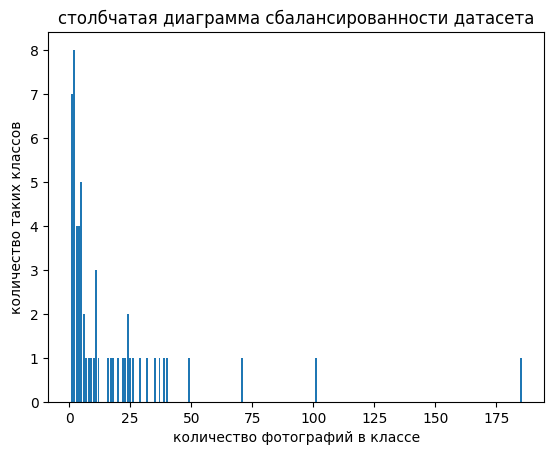

In [35]:
x, y = list(), list()

for i in range(max(list_count) + 1):
  if (list_count.count(i) > 0):
    x.append(i), y.append(list_count.count(i))

plt.bar(x, y)

# setting x-label as pen sold
plt.xlabel('количество фотографий в классе')

# setting y_label as price
plt.ylabel("количество таких классов")
plt.title('столбчатая диаграмма сбалансированности датасета')
plt.show()

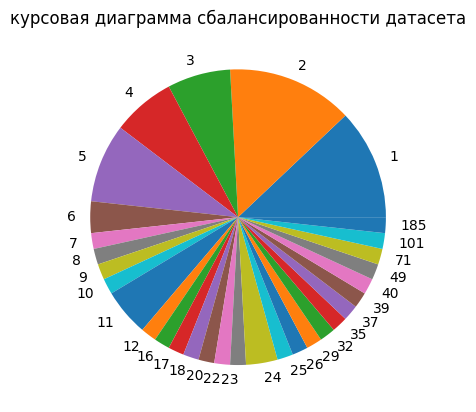

In [36]:
# данные для диаграммы
labels = x
values = y

# создание диаграммы
plt.pie(values, labels=labels)

# комментарии к диаграмме
plt.title('курсовая диаграмма сбалансированности датасета')

# отображение диаграммы
plt.show()

## Выводы из анализа датасета

1) Как видно из описания датасета и представленных картинок, на датасете изображены фотографии отелей с различными шумами и большой дисперсией. То есть некоторые фотографии перевёрнуты, некоторые визуально испорчены, некоторые сделаны в хорошем качестве, иные - в плохом.

2) Выше массив всех встречающихся размеров изображений, как видно в тестовой выборке встречаются len(list_sizes) = 15 уникальных размеров

3) В моём датасете 1000 объектов в целях экономии времени анализа данных

4) Все изображения из класса traffickcam (так как мой сервис для инопланетян будет давать им не вылизанные фотографии, а реалистичный фотоматериал). Так что уникальными классами можно считать chain_id отелей на фотографиях, выше представлен их полный список из 58 штук.

5) Очевидно, что относительно рассмотрения класса trafickcam датасет является сбалансированным, но если брать за класс chain_id, то датасет (ввиду представленной выше аналитики) не сбалансирован, однако по представленным диаграммам видно, что преобладают классы с малым (< 10) количеством фотографий

## Start of image captioning

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.5 MB/s eta 0:00:00


In [ ]:
from transformers import CLIPProcessor, CLIPModel

In [ ]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [ ]:
#!pip install clip

In [ ]:
#!pip install openai-clip

In [ ]:
#!pip uninstall clip

In [ ]:
!pip install git+https://github.com/openai/CLIP

  Cloning https://github.com/openai/CLIP to /tmp/pip-req-build-nm9k4x0p
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP /tmp/pip-req-build-nm9k4x0p
  Resolved https://github.com/openai/CLIP to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.0 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=a9fc67e97887f0ed8a9e40d7497c89cbedcc51dcc0d3c97751052834cb8d2b97
  Stored in directory: /tmp/pip-ephem-wheel-cache-uh3xx39q/wheels/36/76/30/6f371f2bcd119a5b9e0b3605fa8b3ca0f629a9162b91c3d9e2
Successfully built clip


Переходим к коду

Используем эту картинку как пример работы алгоритмов image captioning

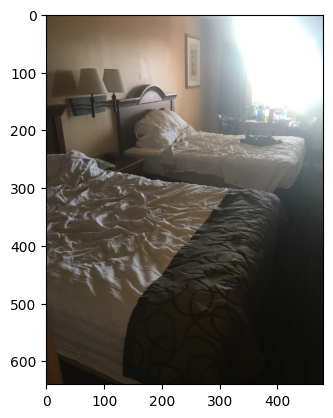

In [ ]:
show_image('/content/images/train/0/123137/traffickcam/2589812.jpg')

Первый пример использования image capturing. Здесь на выходе получаем вероятности принадлежности к тегу

In [ ]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 63.9MiB/s]


In [ ]:
model

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

In [37]:
image_pass = all_pictures[0]

In [ ]:
image = preprocess(Image.open(image_pass)).unsqueeze(0).to(device)
tags = ["a bed", "a hotel", "yellow walls", "hostel"]
text = clip.tokenize(tags).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)

    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

In [ ]:
probs

array([[0.4331041 , 0.51144   , 0.000762  , 0.05469393]], dtype=float32)

как видно, image captioning выдаёт адекватное распределение вероятности принадлежности к тегам. Так, картинка была верно отнесена к классу отелей/хостелов кровать также была замечена

Пример получения вероятностей принадлежности к классу для датасета CIFAR

In [ ]:
from torchvision.datasets import CIFAR100

In [ ]:
# Download the dataset
cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

# Prepare the inputs
image, class_id = cifar100[3637]
image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)

# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")

100%|██████████| 169001437/169001437 [00:03<00:00, 46286010.39it/s]


Extracting /root/.cache/cifar-100-python.tar.gz to /root/.cache

Top predictions:

           snake: 65.31%
          turtle: 12.29%
    sweet_pepper: 3.83%
          lizard: 1.88%
       crocodile: 1.75%


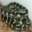

In [ ]:
image

Логическое продолжение первого примера, здесь на выходе получаются те же вероятности принадлежности к тегам

In [ ]:
import PIL

In [ ]:
image = PIL.Image.open(image_pass)
image_input = preprocess(image).unsqueeze(0).to(device)
tags = ['bed', 'chair', 'window']
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in tags]).to(device)


In [ ]:
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

In [ ]:
similarity

tensor([[0.9914, 0.0017, 0.0069]])

хочу заметить, что адекватность image captioning этим примером также доказана

Завёрнутая в функцию задача

In [ ]:
def ImageCap(image_pass, tags):
  image = PIL.Image.open(image_pass)
  image_input = preprocess(image).unsqueeze(0).to(device)
  text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in tags]).to(device)
  with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

  image_features /= image_features.norm(dim=-1, keepdim=True)
  text_features /= text_features.norm(dim=-1, keepdim=True)

  similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

  return similarity

In [ ]:
ImageCap(image_pass, ['bed', 'chair', 'window'])

tensor([[0.9914, 0.0017, 0.0069]])

## All dataset image captioning

теперь проанализируем всю выборку фотографий отелей, используя следующий набор тегов

скрипт для составления описания будет позднее, для начала кластеризуем отельные номера по следующим описаниям

In [ ]:
# в этом массиве будут храниться возможные описания отельного номера, задача кластеризации решается путём выбора наиболее подходящего описания
descriptions = ['cheap room in hostel with bad interior',
        'cheap room in hotel with bad interior',
        'average quality hotel room with average interior quality',
        'superior hotel room with higher quality interier',
        'luxury hotel room with luxury interier']

In [ ]:
dict_for_description_clasterization = dict()

In [ ]:
for pas in tqdm(all_pictures):
  dict_for_description_clasterization[pas] = ImageCap(pas, descriptions)

100%|██████████| 1000/1000 [16:31<00:00,  1.01it/s]


пример того, что лежит в dict()

In [ ]:
dict_for_description_clasterization[all_pictures[0]]

tensor([[1.9893e-04, 7.6856e-02, 2.9501e-02, 6.4927e-01, 2.4418e-01]])

теперь сделаем функцию, которая выдатёт наиболее подходящее описание к фотографии из 5-ти возможных

In [ ]:
def make_description(image_pass, tags):
  list_probs = ImageCap(image_pass, tags).tolist()[0]
  return tags[list_probs.index(max(list_probs))]

In [ ]:
# пример работы функции
make_description(all_pictures[0], descriptions)

'superior hotel room with higher quality interier'

Приведём статистику кластеризации изображений из выборки по представленным описаниям

In [ ]:
count_of_items = list()
for i in range(len(descriptions)):
  count_of_items.append(0)
for pas in tqdm(all_pictures):
  list_probs = dict_for_description_clasterization[pas].tolist()[0]
  count_of_items[list_probs.index(max(list_probs))] += 1
count_of_items

100%|██████████| 1000/1000 [00:00<00:00, 262521.37it/s]


[0, 80, 16, 460, 444]

In [ ]:
x = descriptions
y = count_of_items

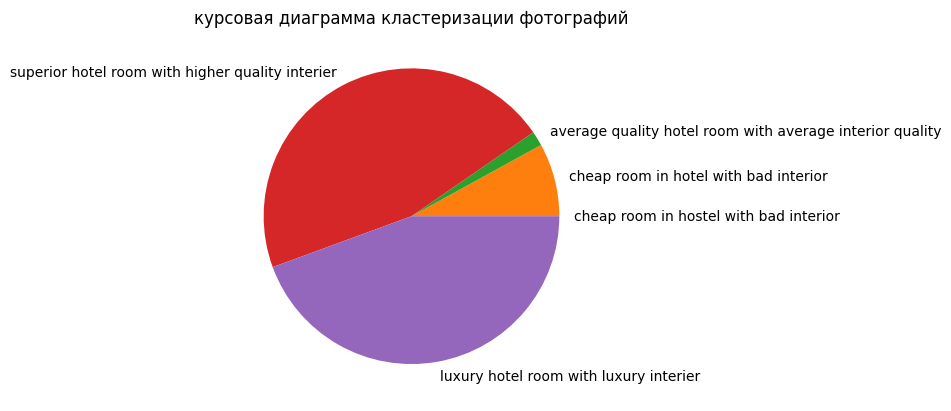

In [ ]:
# данные для диаграммы
labels = x
values = y

# создание диаграммы
plt.pie(values, labels=labels)

# комментарии к диаграмме
plt.title('курсовая диаграмма кластеризации фотографий')

# отображение диаграммы
plt.show()

Теперь напишем код для следующей задачи (чуть более творческой): на вход подаётся картинка, на выходе имеем её вольное описание моделью image captioning. Таким образом мы не сможем решить задачу кластеризации (эту цель мы преследовали выше), зато получим чуть более подробное и универсальное отображение увиденного

Импортируем нужные библиотеки

In [ ]:
from transformers import *

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attentio

грузим модель

In [ ]:
# load a fine-tuned image captioning model and corresponding tokenizer and image processor
finetuned_model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)
finetuned_tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
finetuned_image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/config.json
Model config VisionEncoderDecoderConfig {
  "_name_or_path": "vit-gpt-pt",
  "architectures": [
    "VisionEncoderDecoderModel"
  ],
  "bos_token_id": 50256,
  "decoder": {
    "_name_or_path": "",
    "activation_function": "gelu_new",
    "add_cross_attention": true,
    "architectures": [
      "GPT2LMHeadModel"
    ],
    "attn_pdrop": 0.1,
    "bad_words_ids": null,
    "begin_suppress_tokens": null,
    "bos_token_id": 50256,
    "chunk_size_feed_forward": 0,
    "cross_attention_hidden_size": null,
    "decoder_start_token_id": 50256,
    "diversity_penalty": 0.0,
    "do_sample": false,
    "early_stopping": false,
    "embd_pdrop": 0.1,
    "encoder_no_repeat_ngram_size": 0,
    "eos_token_id": 50256,
    "exponential_decay_length_penalty": null,
    "finetuning_task": null,
    "forced_bo

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/pytorch_model.bin
Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.32.1"
}

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.32.1"
}

All model checkpoint weights were used when initializing VisionEncoderDecoderModel.

All the weights of VisionEncoderDecoderModel were initialized from the model checkpoint at nlpconnect/vit-gpt2-image-captioning.
If your task is similar to the task the model of the checkpoint was trained on, you can already use VisionEncoderDecoderModel for predictions without further train

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/merges.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/tokenizer_config.json


loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/preprocessor_config.json
size should be a dictionary on of the following set of keys: ({'height', 'width'}, {'shortest_edge'}, {'longest_edge', 'shortest_edge'}, {'longest_edge'}), got 224. Converted to {'height': 224, 'width': 224}.
Image processor ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



функция для генерации описания к картинке

In [ ]:
import urllib.parse as parse
import os

# a function to perform inference
def get_caption(model, image_processor, tokenizer, image_path):
    #image = load_image(image_path)
    image = Image.open(image_path)
    # preprocess the image
    img = image_processor(image, return_tensors="pt").to(device)
    # generate the caption (using greedy decoding by default)
    output = model.generate(**img)
    # decode the output
    caption = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
    return caption

In [ ]:
# get the caption
get_caption(finetuned_model, finetuned_image_processor, finetuned_tokenizer, all_pictures[0])

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.32.1"
}

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1254: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


'a bed with a lamp and a night stand '

целевая функция

In [ ]:
def make_creative_description(image_path, finetuned_model, finetuned_image_processor, finetuned_tokenizer):
  show_image(image_path)
  return get_caption(finetuned_model, finetuned_image_processor, finetuned_tokenizer, image_path)

пример работы на изображении из датасета

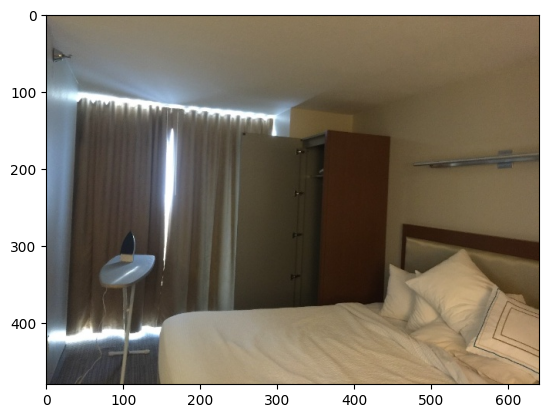

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.32.1"
}



'a bed with a lamp and a night stand '

In [ ]:
make_creative_description(all_pictures[0], finetuned_model, finetuned_image_processor, finetuned_tokenizer)

## Transformation of image for aliens

для  начала представляю вам фотографию типичного инопришенельца

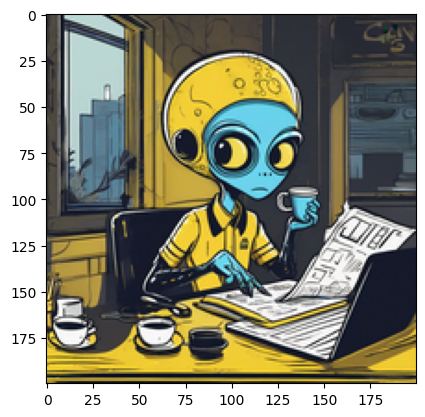

In [38]:
show_image('/content/alien_tinkoff_worker_small.png') # сгенерировано StableDiffusionMagic

Будем исходить из того, что инопланетяне не хотят разочароваться, когда прилетят в отель, но картинка должна быть для них стилистически понятна. Конечно можно воспользоваться StableDiffusionMagic, но я считаю, что данное задание по стилистическому преобразованию будет интересней выполнить с помощью своей нейросети.

Для начала импортируем нужные библиотеки

In [44]:
from __future__ import division
from torchvision import models
from torchvision import transforms
from PIL import Image
import argparse
import torch
import torchvision
import torch.nn as nn
import numpy as np
import os

In [40]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

напишем функцию для загрузки и первичного преобразования изображения

In [41]:
def load_image(image_path, transform=None, max_size=None, shape=None):
    """Load an image and convert it to a torch tensor."""
    image = Image.open(image_path)

    if max_size:
        scale = max_size / max(image.size)
        size = np.array(image.size) * scale
        image = image.resize(size.astype(int), Image.ANTIALIAS)

    if shape:
        image = image.resize(shape, Image.LANCZOS)

    if transform:
        image = transform(image).unsqueeze(0)

    return image.to(device)


напишем структуру нейросети

In [42]:
class VGGNet(nn.Module):
    def __init__(self):
        # Select conv1_1 ~ conv5_1 activation maps.
        super(VGGNet, self).__init__()
        self.select = ['0', '5', '10', '19', '28']
        self.vgg = models.vgg19(pretrained=True).features

    def forward(self, x):
        # Extract multiple convolutional feature maps.
        features = []
        for name, layer in self.vgg._modules.items():
            x = layer(x)
            if name in self.select:
                features.append(x)
        return features


теперь напишем основную (main) функцию, которая будет трансформировать и стилизовать изображения отелей

In [54]:
def main(config):

    # Image preprocessing
    # VGGNet was trained on ImageNet where images are normalized by mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225].
    # We use the same normalization statistics here.

    os.makedirs('./transform_history')

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.485, 0.456, 0.406),
                             std=(0.229, 0.224, 0.225))])

    # Load content and style images
    # Make the style image same size as the content image
    content = load_image(config.content, transform, max_size=config.max_size)
    style = load_image(config.style, transform, shape=[content.size(2), content.size(3)])

    # Initialize a target image with the content image
    target = content.clone().requires_grad_(True)

    optimizer = torch.optim.Adam([target], lr=config.lr, betas=[0.5, 0.999])
    vgg = VGGNet().to(device).eval()

    for step in tqdm(range(config.total_step)):

        # Extract multiple(5) conv feature vectors
        target_features = vgg(target)
        content_features = vgg(content)
        style_features = vgg(style)

        style_loss = 0
        content_loss = 0
        for f1, f2, f3 in zip(target_features, content_features, style_features):
            # Compute content loss with target and content images
            content_loss += torch.mean((f1 - f2)**2)

            # Reshape convolutional feature maps
            _, c, h, w = f1.size()
            f1 = f1.view(c, h * w)
            f3 = f3.view(c, h * w)

            # Compute gram matrix
            f1 = torch.mm(f1, f1.t())
            f3 = torch.mm(f3, f3.t())

            # Compute style loss with target and style images
            style_loss += torch.mean((f1 - f3)**2) / (c * h * w)

        # Compute total loss, backprop and optimize
        loss = content_loss + config.style_weight * style_loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (step+1) % config.log_step == 0:
            print ('Step [{}/{}], Content Loss: {:.4f}, Style Loss: {:.4f}'
                   .format(step+1, config.total_step, content_loss.item(), style_loss.item()))

        if (step+1) % config.sample_step == 0 or step == 0:
            # Save the generated image
            denorm = transforms.Normalize((-2.12, -2.04, -1.80), (4.37, 4.46, 4.44))
            img = target.clone().squeeze()
            img = denorm(img).clamp_(0, 1)
            torchvision.utils.save_image(img, '/content/transform_history/output-{}.png'.format(step+1))

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    content_path = all_pictures[68]
    style_path = '/content/alien_tinkoff_worker_small.png'
    parser.add_argument('--content', type=str, default=content_path)
    parser.add_argument('--style', type=str, default=style_path)
    parser.add_argument('--max_size', type=int, default=400)
    parser.add_argument('--total_step', type=int, default=200) # changes parameter
    parser.add_argument('--log_step', type=int, default=10)
    parser.add_argument('--sample_step', type=int, default=50) # changes parameter
    parser.add_argument('--style_weight', type=float, default=100)
    parser.add_argument('--lr', type=float, default=0.003)
    parser.add_argument('-f')
    config = parser.parse_args()
    print(config)
    main(config)

Namespace(content='/content/images/train/92/57552/traffickcam/2588559.jpg', style='/content/alien_tinkoff_worker_small.png', max_size=400, total_step=200, log_step=10, sample_step=50, style_weight=100, lr=0.003, f='/root/.local/share/jupyter/runtime/kernel-e99e56ca-5cfe-4788-8de2-0bc15fe0b899.json')


<ipython-input-41-ae0e545725ab>:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(size.astype(int), Image.ANTIALIAS)
  5%|▌         | 10/200 [03:13<59:55, 18.92s/it] 

Step [10/200], Content Loss: 4.3605, Style Loss: 900.7515


 10%|█         | 20/200 [06:15<54:17, 18.10s/it]

Step [20/200], Content Loss: 10.0221, Style Loss: 738.1594


 15%|█▌        | 30/200 [09:12<50:07, 17.69s/it]

Step [30/200], Content Loss: 13.8308, Style Loss: 619.8037


 20%|██        | 40/200 [12:12<47:52, 17.95s/it]

Step [40/200], Content Loss: 16.8078, Style Loss: 532.6387


 25%|██▌       | 50/200 [15:15<45:19, 18.13s/it]

Step [50/200], Content Loss: 19.2393, Style Loss: 466.3864


 30%|███       | 60/200 [18:15<43:15, 18.54s/it]

Step [60/200], Content Loss: 21.2173, Style Loss: 414.7995


 35%|███▌      | 70/200 [21:12<38:12, 17.63s/it]

Step [70/200], Content Loss: 22.8882, Style Loss: 373.7476


 40%|████      | 80/200 [24:12<36:16, 18.13s/it]

Step [80/200], Content Loss: 24.3043, Style Loss: 340.4593


 45%|████▌     | 90/200 [27:10<32:32, 17.75s/it]

Step [90/200], Content Loss: 25.5072, Style Loss: 313.0495


 50%|█████     | 100/200 [30:10<29:56, 17.96s/it]

Step [100/200], Content Loss: 26.5456, Style Loss: 290.0246


 55%|█████▌    | 110/200 [33:11<27:46, 18.52s/it]

Step [110/200], Content Loss: 27.4514, Style Loss: 270.4239


 60%|██████    | 120/200 [36:08<23:24, 17.56s/it]

Step [120/200], Content Loss: 28.2312, Style Loss: 253.4875


 65%|██████▌   | 130/200 [39:11<21:05, 18.08s/it]

Step [130/200], Content Loss: 28.9114, Style Loss: 238.6358


 70%|███████   | 140/200 [42:08<17:38, 17.65s/it]

Step [140/200], Content Loss: 29.5112, Style Loss: 225.4459


 75%|███████▌  | 150/200 [45:08<15:03, 18.06s/it]

Step [150/200], Content Loss: 30.0451, Style Loss: 213.6028


 80%|████████  | 160/200 [48:03<11:33, 17.34s/it]

Step [160/200], Content Loss: 30.5344, Style Loss: 202.8590


 85%|████████▌ | 170/200 [51:02<08:56, 17.87s/it]

Step [170/200], Content Loss: 30.9831, Style Loss: 193.0597


 90%|█████████ | 180/200 [54:01<06:07, 18.40s/it]

Step [180/200], Content Loss: 31.3884, Style Loss: 184.0894


 95%|█████████▌| 190/200 [56:56<02:54, 17.49s/it]

Step [190/200], Content Loss: 31.7629, Style Loss: 175.8103


100%|██████████| 200/200 [59:56<00:00, 17.98s/it]

Step [200/200], Content Loss: 32.1106, Style Loss: 168.1200


Проследим эволюцию изображения

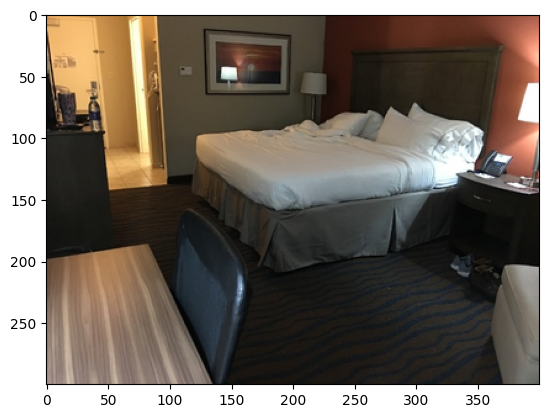

In [55]:
show_image('/content/transform_history/output-1.png')

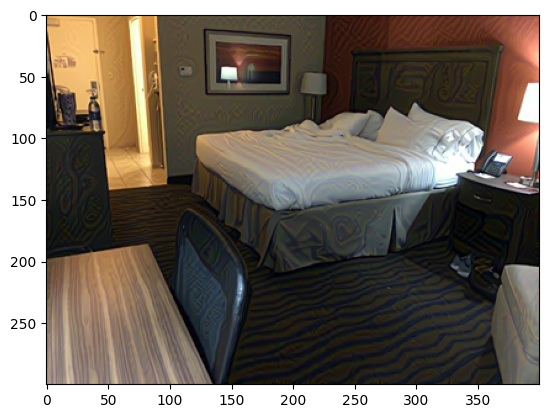

In [57]:
show_image('/content/transform_history/output-50.png')

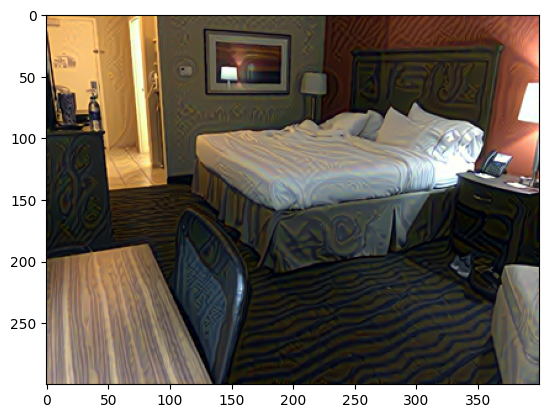

In [58]:
show_image('/content/transform_history/output-100.png')

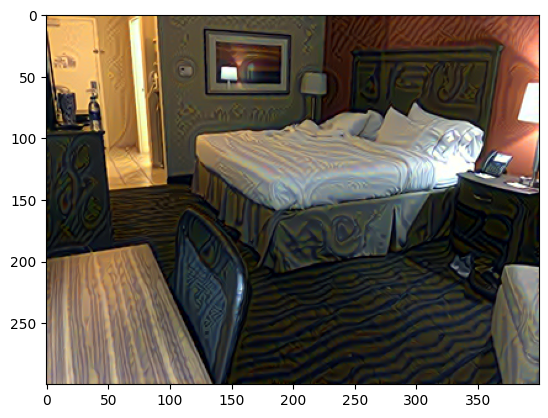

In [59]:
show_image('/content/transform_history/output-150.png')

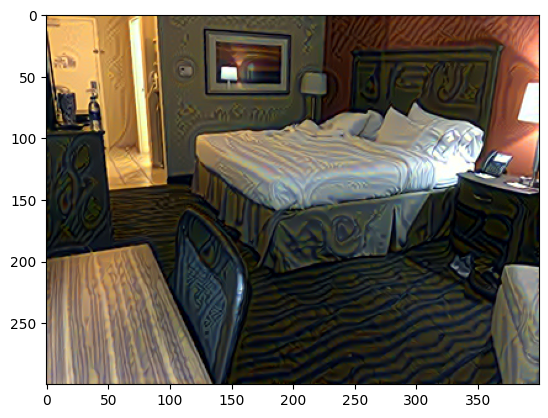

In [56]:
show_image('/content/transform_history/output-200.png')

Вывод: данная нейросеть действительно преобразует изображение в более инопланетянский вид, в соответствии с представленным сгенерированным инопланетянином

## Итоговое преобразование фотографии

теперь используем другое изображение, при этом построим (для наглядности функцию лоссов)

In [93]:
list_content_loss = list()
list_style_loss = list()

In [94]:
def main(config):
    global list_content_loss, list_style_loss
    # Image preprocessing
    # VGGNet was trained on ImageNet where images are normalized by mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225].
    # We use the same normalization statistics here.

    os.makedirs('./transform_history_2')

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.485, 0.456, 0.406),
                             std=(0.229, 0.224, 0.225))])

    # Load content and style images
    # Make the style image same size as the content image
    content = load_image(config.content, transform, max_size=config.max_size)
    style = load_image(config.style, transform, shape=[content.size(2), content.size(3)])

    # Initialize a target image with the content image
    target = content.clone().requires_grad_(True)

    optimizer = torch.optim.Adam([target], lr=config.lr, betas=[0.5, 0.999])
    vgg = VGGNet().to(device).eval()

    for step in tqdm(range(config.total_step)):

        # Extract multiple(5) conv feature vectors
        target_features = vgg(target)
        content_features = vgg(content)
        style_features = vgg(style)

        style_loss = 0
        content_loss = 0
        for f1, f2, f3 in zip(target_features, content_features, style_features):
            # Compute content loss with target and content images
            content_loss += torch.mean((f1 - f2)**2)

            # Reshape convolutional feature maps
            _, c, h, w = f1.size()
            f1 = f1.view(c, h * w)
            f3 = f3.view(c, h * w)

            # Compute gram matrix
            f1 = torch.mm(f1, f1.t())
            f3 = torch.mm(f3, f3.t())

            # Compute style loss with target and style images
            style_loss += torch.mean((f1 - f3)**2) / (c * h * w)

        # Compute total loss, backprop and optimize
        loss = content_loss + config.style_weight * style_loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        list_content_loss.append(content_loss.item())
        list_style_loss.append(style_loss.item())

        if (step+1) % config.log_step == 0:
            print ('Step [{}/{}], Content Loss: {:.4f}, Style Loss: {:.4f}'
                   .format(step+1, config.total_step, content_loss.item(), style_loss.item()))

        if (step+1) % config.sample_step == 0 or step == 0:
            # Save the generated image
            denorm = transforms.Normalize((-2.12, -2.04, -1.80), (4.37, 4.46, 4.44))
            img = target.clone().squeeze()
            img = denorm(img).clamp_(0, 1)
            torchvision.utils.save_image(img, '/content/transform_history_2/output-{}.png'.format(step+1))

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    content_path = all_pictures[90]
    style_path = '/content/alien_tinkoff_worker_small.png'
    parser.add_argument('--content', type=str, default=content_path)
    parser.add_argument('--style', type=str, default=style_path)
    parser.add_argument('--max_size', type=int, default=400)
    parser.add_argument('--total_step', type=int, default=250) # changes parameter
    parser.add_argument('--log_step', type=int, default=10)
    parser.add_argument('--sample_step', type=int, default=50) # changes parameter
    parser.add_argument('--style_weight', type=float, default=100)
    parser.add_argument('--lr', type=float, default=0.003)
    parser.add_argument('-f')
    config = parser.parse_args()
    print(config)
    main(config)

Namespace(content='/content/images/train/77/117835/traffickcam/2587992.jpg', style='/content/alien_tinkoff_worker_small.png', max_size=400, total_step=250, log_step=10, sample_step=50, style_weight=100, lr=0.003, f='/root/.local/share/jupyter/runtime/kernel-e99e56ca-5cfe-4788-8de2-0bc15fe0b899.json')


<ipython-input-41-ae0e545725ab>:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(size.astype(int), Image.ANTIALIAS)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
  4%|▍         | 10/250 [02:54<1:09:42, 17.43s/it]

Step [10/250], Content Loss: 4.2543, Style Loss: 1134.6703


  8%|▊         | 20/250 [05:54<1:08:26, 17.85s/it]

Step [20/250], Content Loss: 10.4400, Style Loss: 938.2800


 12%|█▏        | 30/250 [08:52<1:04:47, 17.67s/it]

Step [30/250], Content Loss: 14.4872, Style Loss: 792.7422


 16%|█▌        | 40/250 [11:51<1:02:02, 17.73s/it]

Step [40/250], Content Loss: 17.4691, Style Loss: 687.4836


 20%|██        | 50/250 [14:49<1:00:08, 18.04s/it]

Step [50/250], Content Loss: 19.8525, Style Loss: 608.6252


 24%|██▍       | 60/250 [17:47<56:06, 17.72s/it]

Step [60/250], Content Loss: 21.8116, Style Loss: 547.4470


 28%|██▊       | 70/250 [20:43<52:57, 17.65s/it]

Step [70/250], Content Loss: 23.4538, Style Loss: 498.5972


 32%|███▏      | 80/250 [23:42<49:53, 17.61s/it]

Step [80/250], Content Loss: 24.8564, Style Loss: 458.6840


 36%|███▌      | 90/250 [26:39<47:45, 17.91s/it]

Step [90/250], Content Loss: 26.0585, Style Loss: 425.5233


 40%|████      | 100/250 [29:37<44:30, 17.80s/it]

Step [100/250], Content Loss: 27.0882, Style Loss: 397.4766


 44%|████▍     | 110/250 [32:31<40:25, 17.32s/it]

Step [110/250], Content Loss: 27.9902, Style Loss: 373.3129


 48%|████▊     | 120/250 [35:30<38:21, 17.70s/it]

Step [120/250], Content Loss: 28.7899, Style Loss: 352.2671


 52%|█████▏    | 130/250 [38:26<35:09, 17.58s/it]

Step [130/250], Content Loss: 29.4942, Style Loss: 333.6249


 56%|█████▌    | 140/250 [41:25<31:54, 17.40s/it]

Step [140/250], Content Loss: 30.1358, Style Loss: 316.9244


 60%|██████    | 150/250 [44:24<30:29, 18.29s/it]

Step [150/250], Content Loss: 30.7222, Style Loss: 301.8215


 64%|██████▍   | 160/250 [47:21<27:07, 18.08s/it]

Step [160/250], Content Loss: 31.2610, Style Loss: 288.0439


 68%|██████▊   | 170/250 [50:18<23:35, 17.70s/it]

Step [170/250], Content Loss: 31.7489, Style Loss: 275.3871


 72%|███████▏  | 180/250 [53:16<20:38, 17.70s/it]

Step [180/250], Content Loss: 32.2009, Style Loss: 263.6798


 76%|███████▌  | 190/250 [56:14<18:01, 18.03s/it]

Step [190/250], Content Loss: 32.6229, Style Loss: 252.7906


 80%|████████  | 200/250 [59:09<14:35, 17.52s/it]

Step [200/250], Content Loss: 33.0102, Style Loss: 242.6243


 84%|████████▍ | 210/250 [1:02:08<11:40, 17.50s/it]

Step [210/250], Content Loss: 33.3735, Style Loss: 233.0801


 88%|████████▊ | 220/250 [1:05:07<09:07, 18.26s/it]

Step [220/250], Content Loss: 33.7109, Style Loss: 224.0794


 92%|█████████▏| 230/250 [1:08:04<05:53, 17.67s/it]

Step [230/250], Content Loss: 34.0414, Style Loss: 215.5688


 96%|█████████▌| 240/250 [1:11:04<03:00, 18.08s/it]

Step [240/250], Content Loss: 34.3584, Style Loss: 207.4987


100%|██████████| 250/250 [1:14:04<00:00, 17.78s/it]

Step [250/250], Content Loss: 34.6610, Style Loss: 199.8346


Проледим эволюцию изображения

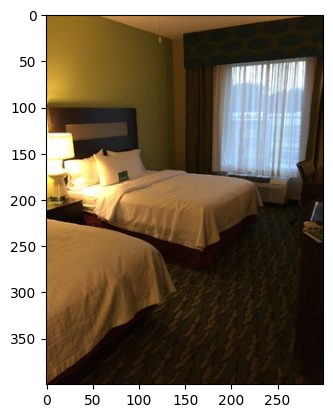

In [95]:
show_image('/content/transform_history_2/output-1.png')

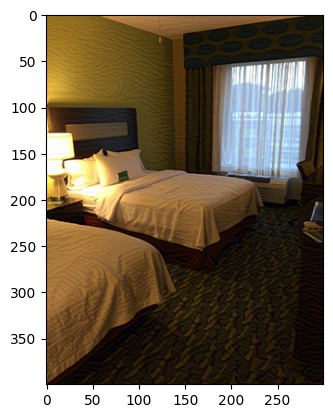

In [96]:
show_image('/content/transform_history_2/output-50.png')

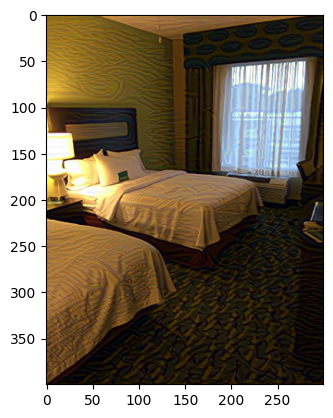

In [97]:
show_image('/content/transform_history_2/output-100.png')

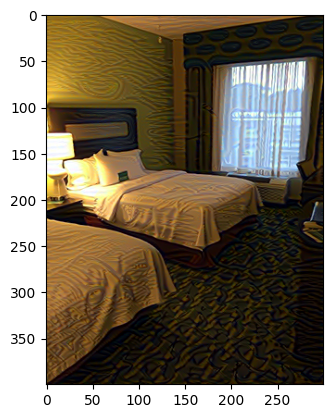

In [98]:
show_image('/content/transform_history_2/output-150.png')

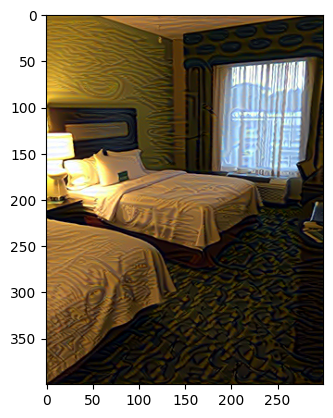

In [99]:
show_image('/content/transform_history_2/output-200.png')

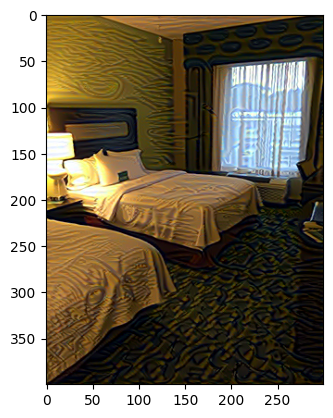

In [100]:
show_image('/content/transform_history_2/output-250.png')

Как видим, 200 итераций достаточно, чтобы немного преобразовать изображение под инопланетян. Для полного преобразования (предположительно) хватит пару тысяч.

## Loss

content loss

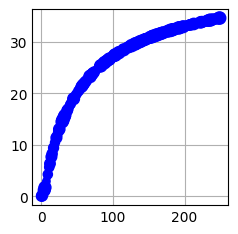

In [107]:
plt.style.use('_mpl-gallery')

# make the data
np.random.seed(3)
x = np.arange(0, len(list_content_loss))
y = list_content_loss
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()



ax.scatter(x, y, s=sizes, c='blue')

plt.show()

style loss

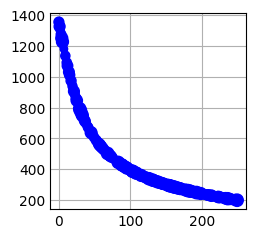

In [108]:
plt.style.use('_mpl-gallery')

# make the data
np.random.seed(3)
x = np.arange(0, len(list_style_loss))
y = list_style_loss
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()



ax.scatter(x, y, s=sizes, c='blue')

plt.show()